In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [214]:


bias = []
for i in range(1,10):
    bias.append(fits.getdata("000000{:02d}.Bias.fit".format(i) , ext=0).astype(np.int))

flat = []
for i in range(1,10):
    flat.append(fits.getdata("000000{:02d}.FlatField.fit".format(i),ext=0).astype(np.int))
    
    

biasGroup4 = []
for i in range(1,10):
    biasGroup4.append(fits.getdata("a4Bias000000{:02d}.fit".format(i) , ext=0).astype(np.int))

flatGroup4 = []
for i in range(11,20):
    flatGroup4.append(fits.getdata("a4FlatField000000{:02d}.fit".format(i),ext=0).astype(np.int))
    
flatMaddie = []
for i in range(11,20):
    flatMaddie.append(fits.getdata("mFlatField000000{:02d}.fit".format(i),ext=0).astype(np.int))  


flatShark = []
for i in range(11,20):
    flatShark.append(fits.getdata("SFlatField000000{:02d}.fit".format(i),ext=0).astype(np.int))  

flat2Awe = []
for i in range(11,20):
    flat2Awe.append(fits.getdata("AFlatField000000{:02d}.fit".format(i),ext=0).astype(np.int))  
    
flatnot6 = []
for i in range(11,20):
    flatnot6.append(fits.getdata("QFlatField000000{:02d}.fit".format(i),ext=0).astype(np.int))  


flatTrogo = []
for i in range(11,20):
    flatTrogo.append(fits.getdata("TFlatField000000{:02d}.fit".format(i),ext=0).astype(np.int))  
    

biasTeam5 = []
for i in range(1,10):
    biasTeam5.append(fits.getdata("kBias000000{:02d}.fit".format(i) , ext=0).astype(np.int))

flatTeam5 = []
for i in range(11,20):
    flatTeam5.append(fits.getdata("kFlatField000000{:02d}.fit".format(i),ext=0).astype(np.int))
    

#temp at -6C   
dark_temp_neg6 = []
for i in range(23,24):
    dark_temp_neg6.append(fits.getdata("kDark000000{:02d}.fit".format(i),ext=0).astype(np.int))
    
#temp at -2C 
dark_temp_neg2 = []
for i in range(25,26):
    dark_temp_neg2.append(fits.getdata("kDark000000{:02d}.fit".format(i),ext=0).astype(np.int))
    
#temp at 2C   
dark_temp_2 = []
for i in range(31,32):
    dark_temp_2.append(fits.getdata("kDark000000{:02d}.fit".format(i),ext=0).astype(np.int))

#temp at 6C
dark_temp_6 = []
for i in range(33,34):
    dark_temp_6.append(fits.getdata("kDark000000{:02d}.fit".format(i),ext=0).astype(np.int))
    
#temp at 10C
dark_temp_10 = []
for i in range(39,40):
    dark_temp_10.append(fits.getdata("kDark000000{:02d}.fit".format(i),ext=0).astype(np.int))

In [215]:
#calculates mean dark values at each temp between the 2 frames

meandark_neg6 = np.asarray(dark_temp_neg6).mean(axis=0)
meandark_neg2 = np.asarray(dark_temp_neg2).mean(axis=0)
meandark_2 = np.asarray(dark_temp_2).mean(axis=0)
meandark_6 = np.asarray(dark_temp_6).mean(axis=0)
meandark_10 = np.asarray(dark_temp_10).mean(axis=0)

std_meandark_neg6 = meandark_neg6.std()
std_meandark_neg2 = meandark_neg2.std()
std_meandark_2 = meandark_2.std()
std_meandark_6 = meandark_6.std()
std_meandark_10 = meandark_10.std()

In [216]:
#calculates variance dark values at each temp between the 2 frames
var_dark_neg6 = np.asarray(dark_temp_neg6).var(axis=0)
var_dark_neg2 = np.asarray(dark_temp_neg6).var(axis=0)
var_dark_2 = np.asarray(dark_temp_2).var(axis=0)
var_dark_6 = np.asarray(dark_temp_6).var(axis=0)
var_dark_10 = np.asarray(dark_temp_10).var(axis=0)

In [217]:
#creates an array of the mean of each dark
meandark = [std_meandark_neg6,std_meandark_neg2,std_meandark_2,std_meandark_6,std_meandark_10]

In [218]:
#creates an array of the variance of each dark temperature
var_dark = [var_dark_neg6, var_dark_neg2, var_dark_2, var_dark_6, var_dark_10]


In [219]:
#creates an array of the temperatures of each dark
tempdark = [-6,-2,2,6,10]

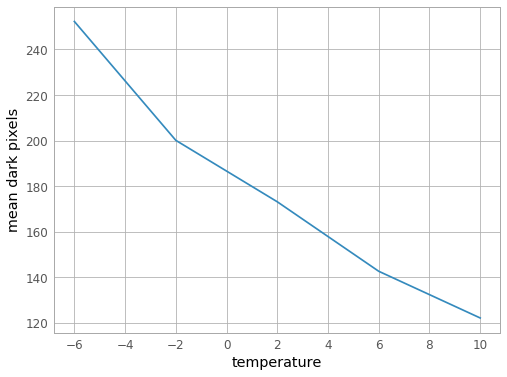

In [220]:
plt.xlabel('temperature')
plt.ylabel('mean dark pixels')
plt.plot(tempdark,meandark)

In [221]:
bias01=(bias[0] - bias[1]).std()
flat01=(flat[0] - flat[1]).std()

In [222]:
#gives mean of bias
meanbias = np.asarray(biasGroup4).mean(axis=0)
avbias=sum(biasGroup4)/10
#gives standard deviation of mean bias
std_bias = meanbias.std()


In [223]:
#gives var of bias
var_bias = np.asarray(biasGroup4).var(axis=0)

#gives standard deviation of variance of the bias
std_bias_var = var_bias.std()

In [224]:
#variance
var_bias = np.asarray(biasGroup4).var(axis=0)

#calculates gain
gain_pixel = meanbias / var_bias

#calculates mean of the variances of the bias
mean_bias_var = np.asarray(var_bias).mean(axis=0)


max gain =  22.0


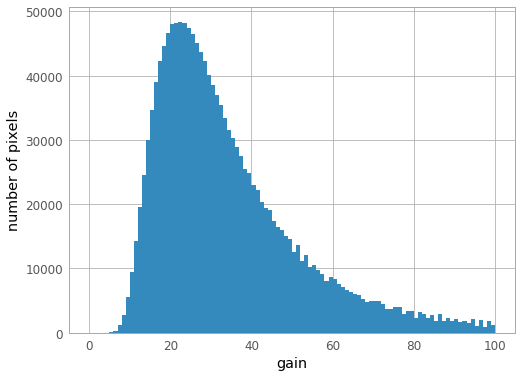

In [225]:
#plots bias gain vs pixels peak is gain
plt.xlabel('gain')
plt.ylabel('number of pixels')
gain_pixel = avbias / var_bias
n, b, patches = plt.hist(gain_pixel.flatten(),100,range=(0,100))
max_gain_150s = np.where(n==n.max())
max_gain_150s = b[max_gain_150s][0]
print("max gain = ", max_gain_150s)
plt.show()



In [226]:
#gives mean of bias
meanflat = np.asarray(flatGroup4).mean(axis=0)
avflat=sum(flatGroup4)/10
#gives standard deviation of mean bias
std_flat = meanflat.std()

In [227]:
#gives var of bias
var_flat = np.asarray(flatGroup4).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_var = var_flat.std()

In [228]:
#variance
var_flat = np.asarray(flatGroup4).var(axis=0)
gain_pixel = avflat / var_flat

mean_flat_var = np.asarray(var_flat).mean(axis=0)

max gain =  0.7000000000000001


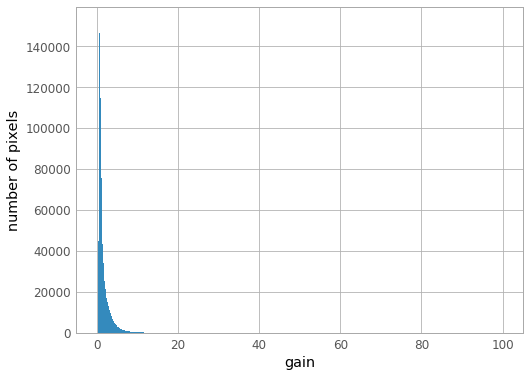

In [229]:
#plots the gain of the flat fields

plt.xlabel('gain')
plt.ylabel('number of pixels')
gain_pixel_flat = avflat / var_flat
n, b, patches = plt.hist(gain_pixel_flat.flatten(),1000,range=(0,100))
max_gain_flat = np.where(n==n.max())
max_gain_flat = b[max_gain_flat][0]
print("max gain = ", max_gain_flat)
plt.show()


max read noise =  12.3


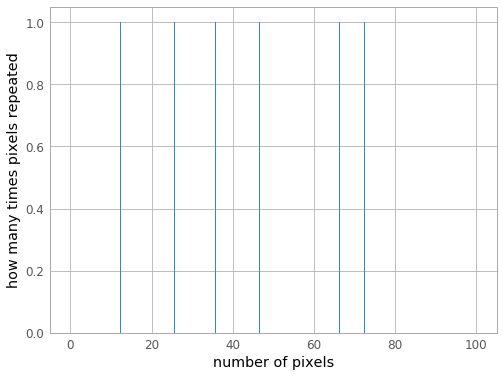

In [230]:
#calculates the read noise
readnoise=gain_pixel_flat*mean_flat_var/np.sqrt(2)

#plots read noise
plt.xlabel('number of pixels')
plt.ylabel('how many times pixels repeated')
n, b, patches = plt.hist(readnoise.flatten(),1000,range=(0,100))
max_read_flat = np.where(n==n.max())
max_read_flat = b[max_read_flat][0]
print("max read noise = ", max_read_flat)


In [231]:
#data of group 1
#gives mean of bias
meanflat1 = np.asarray(flat).mean(axis=0)

#gives average of bias
avflat1=sum(flat)/10

#gives standard deviation of mean bias
std_flat1 = meanflat.std()

#gives var of bias
var_flat1 = np.asarray(flat).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_var1 = var_flat.std()
 
gain_pixel_flat1 = avflat1 / var_flat1

In [232]:
#data of group 5
#gives mean of bias
meanflat5 = np.asarray(flatTeam5).mean(axis=0)

#gives average of bias
avflat5=sum(flatTeam5)/10

#gives standard deviation of mean bias
std_flat5 = meanflat.std()

#gives var of bias
var_flat5 = np.asarray(flatTeam5).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_var5 = var_flat.std()
 
gain_pixel_flat5 = avflat5 / var_flat5

In [233]:
#data of group maddie
#gives mean of bias
meanflatM = np.asarray(flatMaddie).mean(axis=0)

#gives average of bias
avflatM=sum(flatMaddie)/10

#gives standard deviation of mean bias
std_flatM = meanflat.std()

#gives var of bias
var_flatM = np.asarray(flatMaddie).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_varM = var_flat.std()
 
gain_pixel_flatM = avflatM / var_flatM

In [234]:
#data of group shark
#gives mean of bias
meanflatS = np.asarray(flatShark).mean(axis=0)

#gives average of bias
avflatS=sum(flatShark)/10

#gives standard deviation of mean bias
std_flatS = meanflat.std()

#gives var of bias
var_flatS = np.asarray(flatShark).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_varS = var_flat.std()
 
gain_pixel_flatS = avflatS / var_flatS

In [235]:
#data of group 2awe
#gives mean of bias
meanflat2 = np.asarray(flat2Awe).mean(axis=0)

#gives average of bias
avflat2=sum(flat2Awe)/10

#gives standard deviation of mean bias
std_flat2 = meanflat.std()

#gives var of bias
var_flat2 = np.asarray(flat2Awe).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_var2 = var_flat.std()
 
gain_pixel_flat2 = avflat2 / var_flat2

In [236]:
#data of group Trogo
#gives mean of bias
meanflatT = np.asarray(flatTrogo).mean(axis=0)

#gives average of bias
avflatT=sum(flatTrogo)/10

#gives standard deviation of mean bias
std_flatT = meanflat.std()

#gives var of bias
var_flatT = np.asarray(flatTrogo).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_varT = var_flat.std()
 
gain_pixel_flatT = avflatT / var_flatT

In [237]:
#data of group not6
#gives mean of bias
meanflat6 = np.asarray(flatnot6).mean(axis=0)

#gives average of bias
avflat6=sum(flatnot6)/10

#gives standard deviation of mean bias
std_flat6 = meanflat.std()

#gives var of bias
var_flat6 = np.asarray(flatnot6).var(axis=0)

#gives standard deviation of variance of the bias
std_flat_var6 = var_flat.std()
 
gain_pixel_flat6 = avflat6 / var_flat6

In [238]:
linearity=sum(gain_pixel_flat6)+sum(gain_pixel_flatT)+sum(gain_pixel_flat2)+sum(gain_pixel_flatS)+sum(gain_pixel_flatM)+sum(gain_pixel_flat5)+sum(gain_pixel_flat)/(150+120+90+60+75+100)
print(linearity)

[46017.68295827 46667.05209336 46157.33991632 ... 26060.41703299
 25562.1117546  25446.99559468]


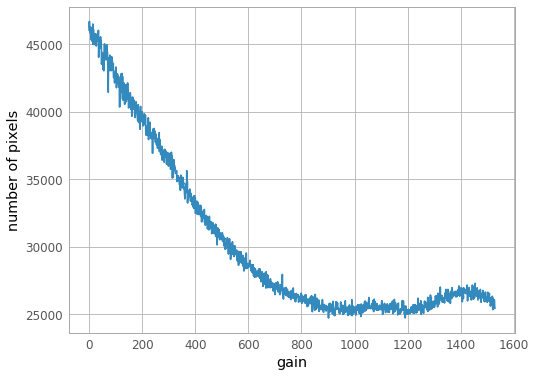

In [239]:
plt.xlabel('gain')
plt.ylabel('number of pixels')
plt.plot(linearity.flatten())


max gain =  2.0


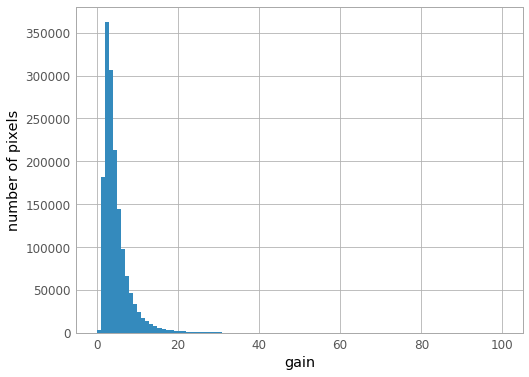

In [240]:
#plots bias gain vs pixels peak is gain team 6
plt.xlabel('gain')
plt.ylabel('number of pixels')
n, b, patches = plt.hist(gain_pixel_flat6.flatten(),100,range=(0,100))
max_gain_100s = np.where(n==n.max())
max_gain_100s = b[max_gain_100s][0]
print("max gain = ", max_gain_100s)
plt.show()


max gain =  0.0


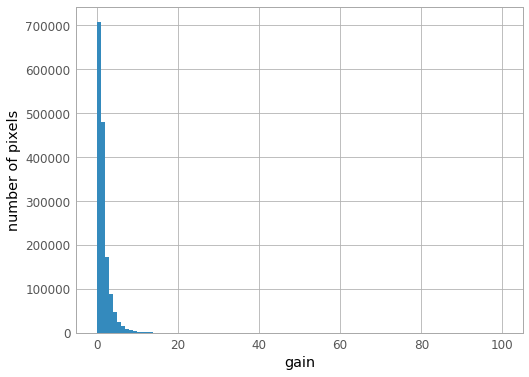

In [241]:
#plots bias gain vs pixels peak is gain team 2
plt.xlabel('gain')
plt.ylabel('number of pixels')
n, b, patches = plt.hist(gain_pixel_flat2.flatten(),100,range=(0,100))
max_gain_90s = np.where(n==n.max())
max_gain_90s = b[max_gain_90s][0]
print("max gain = ", max_gain_90s)
plt.show()


max gain =  3.0


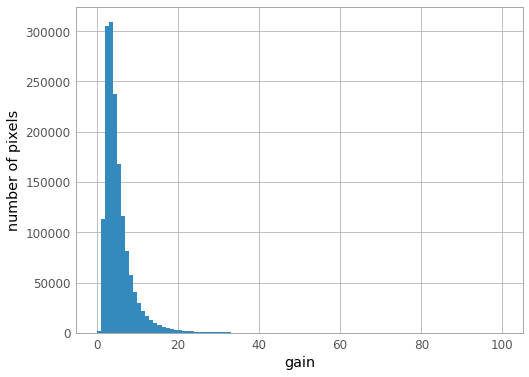

In [242]:
#plots bias gain vs pixels peak is gain team Trogo
plt.xlabel('gain')
plt.ylabel('number of pixels')
n, b, patches = plt.hist(gain_pixel_flatT.flatten(),100,range=(0,100))
max_gain_120s = np.where(n==n.max())
max_gain_120s = b[max_gain_120s][0]
print("max gain = ", max_gain_120s)
plt.show()


max gain =  2.0


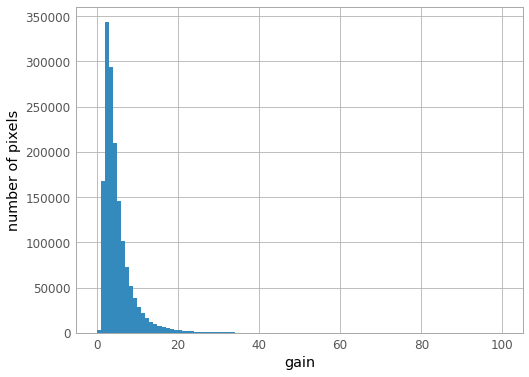

In [243]:
#plots bias gain vs pixels peak is gain team shark
plt.xlabel('gain')
plt.ylabel('number of pixels')
n, b, patches = plt.hist(gain_pixel_flatS.flatten(),100,range=(0,100))
max_gain_75s = np.where(n==n.max())
max_gain_75s = b[max_gain_75s][0]
print("max gain = ", max_gain_75s)
plt.show()


max gain =  3.0


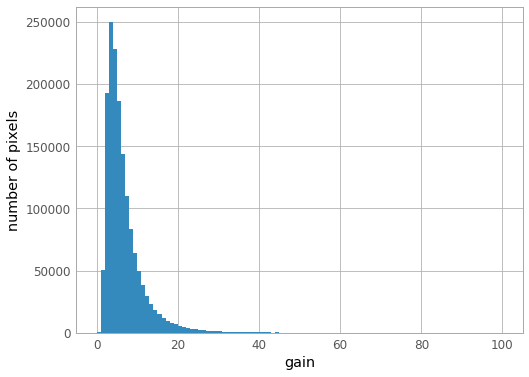

In [244]:
#plots bias gain vs pixels peak is gain team 5
plt.xlabel('gain')
plt.ylabel('number of pixels')
n, b, patches = plt.hist(gain_pixel_flat5.flatten(),100,range=(0,100))
max_gain_60s = np.where(n==n.max())
max_gain_60s = b[max_gain_60s][0]
print("max gain = ", max_gain_60s)
plt.show()


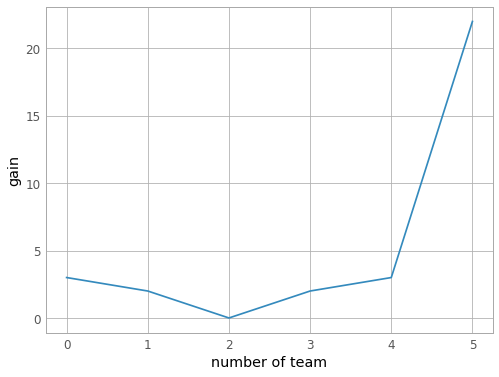

In [247]:
#plot of each teams gain from smallest exposure to most

plt.xlabel('number of team')
plt.ylabel('gain')

max_gain_all = [max_gain_60s,max_gain_75s,max_gain_90s,max_gain_100s,max_gain_120s,max_gain_150s]
plt.plot(max_gain_all)

In [ ]:
#the Eg of silicon from wikipedia is 1.1eV